## Cleaning data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('cleaned_data_per_student.csv')

# Example: assume your features are in X and your target is in y
X = df.drop(columns=['student.isGraduated_max'])   # replace with the correct target column name
y = df['student.isGraduated_max']                  # this is your label column (can be any)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify preserves class balance
)



## Getting correlations

In [4]:
# Select only numeric columns for correlation calculation
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Compute correlations between features and target
correlations = X_train_numeric.corrwith(y_train).abs()

# Top 10 features most correlated with the target
print("Variables with largest absolute correlations")
top_10_correlations = correlations.nlargest(10)
print(top_10_correlations)

# Bottom 10 features least correlated with the target
print("\nVariables with smallest absolute correlations")
print(correlations.nsmallest(10))

Variables with largest absolute correlations
student.term_gpa_last                0.430008
student.term_gpa_mean                0.377270
student.term_gpa_program_last        0.376489
student.term_gpa_max                 0.332418
student.term_gpa_program_mean        0.332369
student.status_academic_desc_last    0.322895
student.term_gpa_program_max         0.309053
student.term_gpa_program_min         0.297526
student.term_gpa_min                 0.181339
student.fte_mean                     0.130811
dtype: float64

Variables with smallest absolute correlations
student_originSchool.isITESM                                0.006953
student.id                                                  0.028398
student_admission_test_valuesIndex.economic_score           0.037292
student_admission_test.score                                0.049315
student_originSchool.gpa                                    0.066939
student_permAddress.zone_type                               0.071894
student_admission_t

c:\Users\Owner\Desktop\8o\compiladores\stats\analisis_cuantitativo_TC3002B\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Owner\Desktop\8o\compiladores\stats\analisis_cuantitativo_TC3002B\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 10 variables más correlacionadas con el objetivo:
['student.term_gpa_last', 'student.term_gpa_mean', 'student.term_gpa_program_last', 'student.term_gpa_max', 'student.term_gpa_program_mean', 'student.status_academic_desc_last', 'student.term_gpa_program_max', 'student.term_gpa_program_min', 'student.term_gpa_min', 'student.fte_mean']
Stats for student_originSchool.isITESM:
Mean: 0.03
Variance: 0.03
STD Dev: 0.18
Asymmetry: 5.20
Kurtosis: 25.07


c:\Users\Owner\Desktop\8o\compiladores\stats\analisis_cuantitativo_TC3002B\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Owner\Desktop\8o\compiladores\stats\analisis_cuantitativo_TC3002B\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


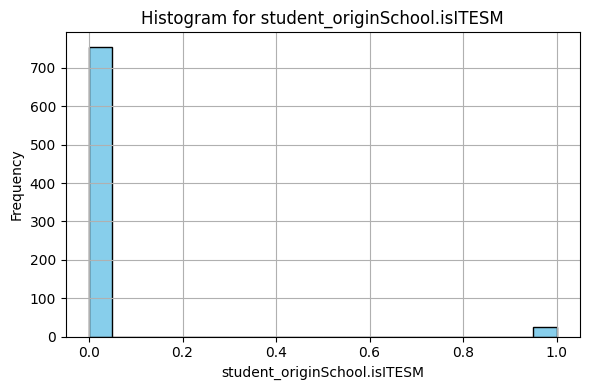

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



# Calcular correlaciones absolutas con la variable objetivo
correlations = X_train_numeric.corrwith(y_train).abs()

# Top 2 variables más correlacionadas
top_10_correlated_vars = correlations.nlargest(10).index.tolist()
print("Top 10 variables más correlacionadas con el objetivo:")
print(top_10_correlated_vars)

to_graph = ["student_originSchool.isITESM"]
# Analizar estadísticamente cada una
for var in to_graph:
    data = X_train_numeric[var].dropna()
    media = data.mean()
    varianza = data.var()
    std_dev = data.std()
    asimetria = skew(data)
    curtosis_val = kurtosis(data)
    
    print(f"Stats for {var}:")
    print(f"Mean: {media:.2f}")
    print(f"Variance: {varianza:.2f}")
    print(f"STD Dev: {std_dev:.2f}")
    print(f"Asymmetry: {asimetria:.2f}")
    print(f"Kurtosis: {curtosis_val:.2f}")
    
    # Histograma
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram for {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


=== Normality Tests for student.fte_mean ===


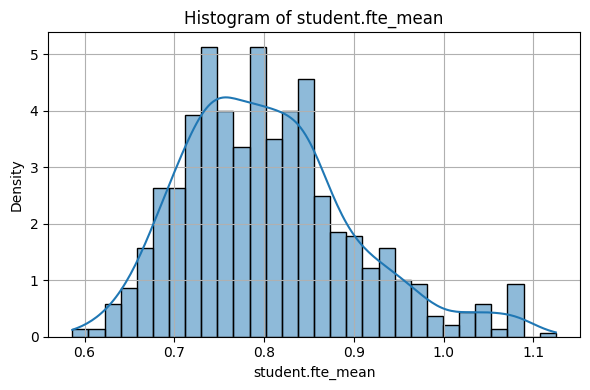

Anderson-Darling Test:
  Statistic: 5.8072
  At 15.0% significance level: Rejected (Critical Value: 0.573)
  At 10.0% significance level: Rejected (Critical Value: 0.653)
  At 5.0% significance level: Rejected (Critical Value: 0.783)
  At 2.5% significance level: Rejected (Critical Value: 0.913)
  At 1.0% significance level: Rejected (Critical Value: 1.086)
Kolmogorov-Smirnov Test:
  KS Statistic: 0.0583
  p-value: 0.0095
  => Reject the null hypothesis (Not normal)


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# que variable vamos a analizar
variables = ['student.fte_mean']

for var in variables:
    data = X_train[var].dropna()  # Drop missing values

    print(f"\n=== Normality Tests for {var} ===")

    # Histograma
    plt.figure(figsize=(6, 4))
    sns.histplot(data, kde=True, stat="density", bins=30)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Anderson-Darling Test
    ad_result = stats.anderson(data, dist='norm')
    print("Anderson-Darling Test:")
    print(f"  Statistic: {ad_result.statistic:.4f}")
    for cv, sig in zip(ad_result.critical_values, ad_result.significance_level):
        result = "Rejected" if ad_result.statistic > cv else "Accepted"
        print(f"  At {sig}% significance level: {result} (Critical Value: {cv:.3f})")

    # Kolmogorov-Smirnov Test 
    ks_stat, ks_pval = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print("Kolmogorov-Smirnov Test:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  p-value: {ks_pval:.4f}")
    if ks_pval < 0.05:
        print("  => Reject the null hypothesis (Not normal)")
    else:
        print("  => Do not reject the null hypothesis (Data may be normal)")


## Linear regression

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define the preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
            ('scaler', StandardScaler())  # Scale numeric features
        ]), numeric_cols),
        
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ]
)

# Apply preprocessing to training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Now, fit the model using preprocessed data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model on preprocessed training data
model.fit(X_train_preprocessed, y_train)


LinearRegression()

In [7]:
print(model.intercept_)
print(model.coef_)

0.8500339010269967
[ 1.64880619e-03  2.19724685e-03  7.16884120e-03 -2.31197957e-03
 -1.98525891e-03  1.29226597e-03 -9.87621068e-03  1.82096975e-03
 -4.92253379e-04  6.69411632e-03 -3.45441777e-03  1.41537693e-03
 -3.50818199e-03 -1.84329774e-03 -1.51736993e-04 -1.80400926e-03
 -7.07038281e-03 -2.77414389e-04  7.81248506e-03  1.57149615e-02
  7.46846891e-03 -7.14044308e-03  9.60552863e-03 -3.27924245e-03
 -1.51904194e-02  3.92662569e-03 -9.35241204e-04  2.12520070e-03
 -1.71182834e-02  2.85901629e-03  0.00000000e+00 -8.50152607e-01
  1.47495461e-01  1.40899064e-01  1.50857414e-01  1.48392299e-01
  6.23561429e-02  1.48087321e-01  1.48644092e-01  1.70569640e-01
  1.39933341e-01  1.50818276e-01  1.49516817e-01  1.57330923e-01
  1.45665081e-01  1.55375978e-01  1.18071164e-01  1.46837330e-01
  1.22976290e-01 -8.35619851e-01 -8.61805626e-01  1.43751448e-01
 -3.18911033e-03  3.18911033e-03  1.17631595e-03  1.58567597e-03
  8.12173825e-03 -1.69723797e-03 -9.18649220e-03  1.67799161e-03
 -3.61

In [8]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, model.predict(X_train_preprocessed))
print("Mean Squared Error (Training Data):", mse_train)


mse_test = mean_squared_error(y_test, model.predict(X_test_preprocessed))
print("Mean Squared Error (Testing Data):", mse_test)


Mean Squared Error (Training Data): 0.002132130346806908
Mean Squared Error (Testing Data): 0.005864084173730048


In [9]:
top_10_variables = top_10_correlations.index

trainData_top_10 = X_train_numeric[top_10_variables]
testData_top_10 = X_test_numeric[top_10_variables]

# New model
model_top_10 = LinearRegression()
model_top_10.fit(trainData_top_10, y_train)

# Calculate the MSE for the training data with the top 10 variables
mse_train_top_10 = mean_squared_error(y_train, model_top_10.predict(trainData_top_10))
print("Mean Squared Error (Training Data - Top 10 variables):", mse_train_top_10)

# Calculate the MSE for the testing data with the top 10 variables
mse_test_top_10 = mean_squared_error(y_test, model_top_10.predict(testData_top_10))
print("Mean Squared Error (Testing Data - Top 10 variables):", mse_test_top_10)


Mean Squared Error (Training Data - Top 10 variables): 0.10364167376488492
Mean Squared Error (Testing Data - Top 10 variables): 0.11526911367597834


# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_preprocessed, y_train)

# Step 5: Make predictions
y_pred = log_model.predict(X_test_preprocessed)

# Step 6: Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.99      1.00      0.99       161

    accuracy                           0.99       196
   macro avg       0.99      0.97      0.98       196
weighted avg       0.99      0.99      0.99       196

